# Author: __Syed Arsalan Amin__
## The Sparks Foundation
### DataScience and Business Intelligence Internship
Task-1: Predict the percentage of an student based on the no. of study hours.What will be predicted score if a student studies for 9.25 hrs/ day?
### Dataset: student_scores - student_scores.csv
### Download dataset from here: [student_scores.csv](http://bit.ly/w-data)


In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd
import seaborn as sns
sns.set()

## Loading and Exploring dataset


In [16]:
dataset = pd.read_csv(
    "E:\\DataScience & AI\\Github_repo\\datasets\\student_scores - student_scores.csv", delimiter=",")  # loading dataset

dataset.shape

dataset.shape
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
X.shape

(25, 1)

In [17]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


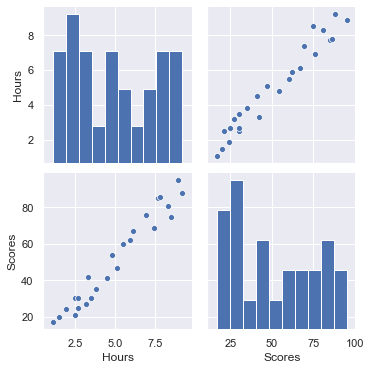

In [15]:
sns.pairplot(dataset)  # to see correlation between the two features

## splitting dataset in train and test set


In [9]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)  # splitting in train and test data

model = LinearRegression()  # loading model
model.fit(X_train, y_train)  # training model

y_pred = model.predict(X_test)
pd.DataFrame({'Actual_Values': y_test, 'Predicted_values': y_pred})


,Actual_Values,Predicted_values
0,76,70.631153
1,75,86.752450
2,17,12.191450
3,30,28.312747
4,25,28.312747


### Visualizing the data and fiiting line from the trained model


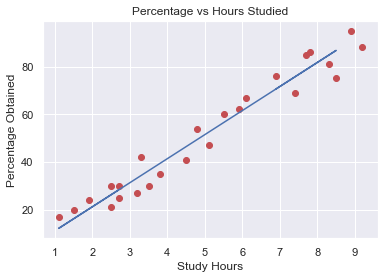

In [10]:


def plot_scatter(x, y):
    plt.scatter(dataset[x], dataset[y], c='r')
    plt.xlabel("Study Hours")
    plt.ylabel("Percentage Obtained")
    plt.title("Percentage vs Hours Studied")


def plot_line():
    # now to use the above data to draw a best-fit line
    line = model.coef_ * X_test + model.intercept_
    plt.plot(X_test, line)


plot_scatter("Hours", "Scores")
plot_line()


## Now if student studies 9.25 hours how many marks would he gain?
For this prediction use the above trained LinearRegression model

In [11]:
hours = 9.25
pred_marks = model.predict([[hours]])
print(f"The student obtains {int(pred_marks[0])} marks if he studies {hours} hours.")

The student obtains 94 marks if he studies 9.25 hours.


## Model evaluation
Calculating mean_absolute_error

In [12]:
print(f"Model has {mean_absolute_error(y_test, y_pred)} of MAE.")

Model has 5.385969567336329 of MAE.
